> #### ***Nelson Cabrera Cano***

#### Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Chessboard

#### Image size

In [2]:
board_pixels = 8

#### Image generation

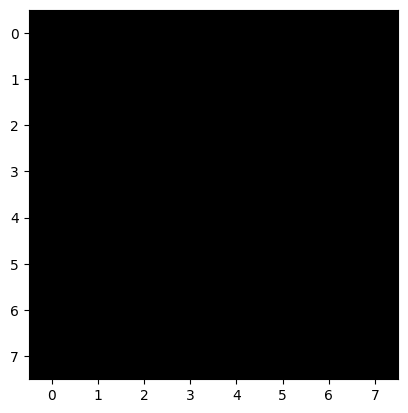

In [3]:
img = np.zeros((board_pixels, board_pixels,1), dtype = np.uint8)
plt.imshow(img, cmap='gray')

#### Chessboard generation

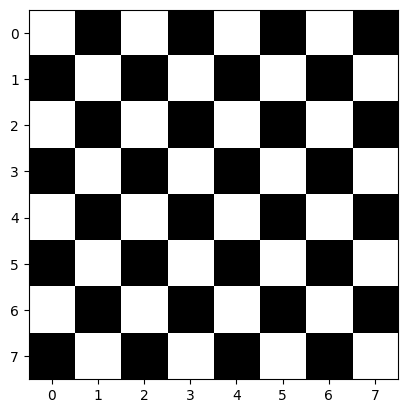

In [4]:
for row in range(0,board_pixels):
    if row % 2:
        for col in range(0, len(img[0])):
            if col%2: img[row][col] = 255
    else:
        for col in range(0, len(img[0])):
            if not col%2: img[row][col] = 255

plt.imshow(img, cmap='gray')

### Piet Mondrian

#### Shape generator

In [5]:
width, heigth = 1000, 1000
img = np.zeros((width, heigth, 3), dtype=np.uint8)

#### Image generator

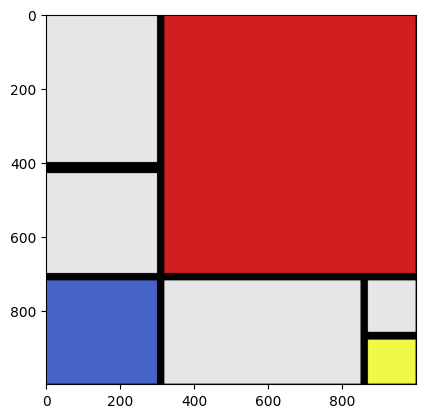

In [6]:
white = (230, 230, 230)
red = (210, 30, 30)
blue = (70, 100, 200)
yellow = (240, 250, 70)

img[0:400, 0:300] = white
img[430:700, 0:300] = white
img[720:999, 0:300] = blue

img[0:700, 320:999] = red

img[720:999, 320:850] = white
img[720:859, 870:999] = white
img[880:999, 870:999] = yellow

plt.imshow(img)

### Mondrian con CV2

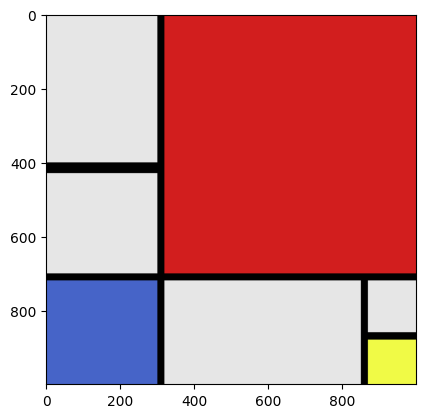

In [7]:
height, width = 1000, 1000

white = (230, 230, 230)
red = (210, 30, 30)
blue = (70, 100, 200)
yellow = (240, 250, 70)

img = np.zeros((height, width, 3), dtype=np.uint8)

cv2.rectangle(img, (0, 0), (300, 400), white, -1)
cv2.rectangle(img, (0, 430), (300, 700), white, -1)
cv2.rectangle(img, (0, 720), (300, 999), blue, -1)

cv2.rectangle(img, (320, 0), (999, 700), red, -1)

cv2.rectangle(img, (320, 720), (850, 999), white, -1)
cv2.rectangle(img, (870, 720), (999, 859), white, -1)
cv2.rectangle(img, (870, 880), (999, 999), yellow, -1)

plt.imshow(img)

### Modificar un plano de imagen captado por webcam

In [14]:
vid = cv2.VideoCapture(0)
cv2.startWindowThread()

if vid.isOpened():
    while True:
        ret, frame = vid.read()
        
        if ret: 
            frame[:,:,1] = (frame[:,:,1]*1.2)%256
            cv2.imshow('Webcam', frame)

        if cv2.waitKey(500) == 27: break

    cv2.destroyAllWindows()
    cv2.waitKey(1)
    vid.release()

### Mostrar círculos en las posiciones más claras y oscuras

#### Pixel más claro y más oscuro

In [9]:
r = 10

vid = cv2.VideoCapture(0)
cv2.startWindowThread()

if vid.isOpened():
    while True:
        ret, frame = vid.read()
        
        if ret:

            _, _, min_pos, max_pos = cv2.minMaxLoc(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

            cv2.circle(frame, max_pos , r, (0,0,0), -1)
            cv2.circle(frame, min_pos , r, (255, 255, 255), -1)

            cv2.imshow('Webcam', frame)

        if cv2.waitKey(500) == 27: break

    cv2.destroyAllWindows()
    cv2.waitKey(1)
    vid.release()

#### Zona 8x8 más clara y oscura

In [10]:
r = 10
ratio = 8

vid = cv2.VideoCapture(0)
cv2.startWindowThread()

if vid.isOpened():
    while True:
        ret, frame = vid.read()
        
        if ret:

            downscaled_frame = cv2.resize(frame, (np.uint(frame.shape[0]/ratio), np.uint(frame.shape[1]/ratio)))

            _, _, min_pos, max_pos = cv2.minMaxLoc(cv2.cvtColor(downscaled_frame, cv2.COLOR_BGR2GRAY))

            min_pos = (min_pos[0]*ratio, min_pos[1]*ratio)
            max_pos = (max_pos[0]*ratio, max_pos[1]*ratio)

            cv2.circle(frame, min_pos , r, (255, 255, 255), -1)
            cv2.circle(frame, max_pos , r, (0,0,0), -1)

            cv2.imshow('Webcam', frame)

        if cv2.waitKey(500) == 27: break

    cv2.destroyAllWindows()
    cv2.waitKey(1)
    vid.release()

### Popart

In [11]:
def createPop(frame):
    ncells = 10
    off = int(ncells/2)
    h, w, c = frame.shape
    down_frame = cv2.resize(frame, (int(w/ncells),int(h/ncells)),cv2.INTER_NEAREST)
    h2, w2, c2 = down_frame.shape

    r = down_frame[:,:,0]
    g = down_frame[:,:,1]
    b = down_frame[:,:,2]

    img = np.zeros((h2*ncells,w2*ncells,3), dtype=np.uint8)

    for y in range(0,h2):
        for x in range(0,w2):
            rad = int ( (r[y,x] + g[y,x] + b[y,x])/(ncells*3*2))
            cv2.circle(img,(x*ncells+off, y*ncells + off), rad, (int(r[y,x]), int(g[y,x]), int(b[y,x])), -1)

    return img

In [12]:
vid = cv2.VideoCapture(0)
cv2.startWindowThread()

width = np.uint(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
height = np.uint(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

_width = np.uint(width/2)
_height = np.uint(height/2)

outframe = np.zeros((height, width, 3), dtype=np.uint8)


if vid.isOpened():
    while True:
        ret, frame = vid.read()
        
        if ret: 
            
            frame = cv2.resize(frame, (_width, _height), cv2.INTER_NEAREST)

            frame00 = np.array(frame); frame10 = np.array(frame); frame01 = np.array(frame); frame11 = np.array(frame)
            b = frame[:,:,0]; g = frame[:,:,1]; r = frame[:,:,2]

            # frame 00
            frame00[:,:,0] = b
            frame00[:,:,1] = g
            frame00[:,:,2] = r

            # frame 01
            frame01[:,:,0] = np.uint8((g))
            frame01[:,:,1] = np.uint8(b)
            frame01[:,:,2] = np.uint8(255-r)

            # frame 10
            frame10[:,:,0] = np.uint8(r)
            frame10[:,:,1] = np.uint8(255-b)
            frame10[:,:,2] = np.uint8(g)

            # # frame 11
            frame11[:,:,0] = np.uint8(255 - g)
            frame11[:,:,1] = np.uint8(r)
            frame11[:,:,2] = np.uint8(b)
            
            outframe[0:_height, 0:_width] = createPop(frame00)
            outframe[0:_height, _width:width] = createPop(createPop(frame01))
            outframe[_height:height, 0:_width] = createPop(frame10)
            outframe[_height:height, _width:width] = createPop(frame11)

            cv2.imshow('Webcam', outframe)

        if cv2.waitKey(200) == 27: break

    cv2.destroyAllWindows()
    cv2.waitKey(1)
    vid.release()

/var/folders/cs/8k4rd8wn11g9t0b617_34rdr0000gp/T/ipykernel_10628/2530231144.py:16: RuntimeWarning: overflow encountered in scalar add
  rad = int ( (r[y,x] + g[y,x] + b[y,x])/(ncells*3*2))
